Linear Regression adalah the line of best fit

# [House Price Predict With Simple Linear Regression]

- 1. Libraries and Data Loading
- 2. Check Correlation Beetween Independent and Dependent Feature
- 3. Outliers Handling
- 4. splitting
- 5. Machine Learning Models

# Libraries and Data Loading

In [300]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=sys.maxsize)
%matplotlib inline

In [301]:
dfRaw = pd.read_csv("kc_house_data.csv")
df = pd.read_csv("kc_house_data.csv")
# https://www.kaggle.com/shivachandel/kc-house-data

In [302]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


# Correlation Feature Checking

Text(0.5, 1.0, 'Correlation ')

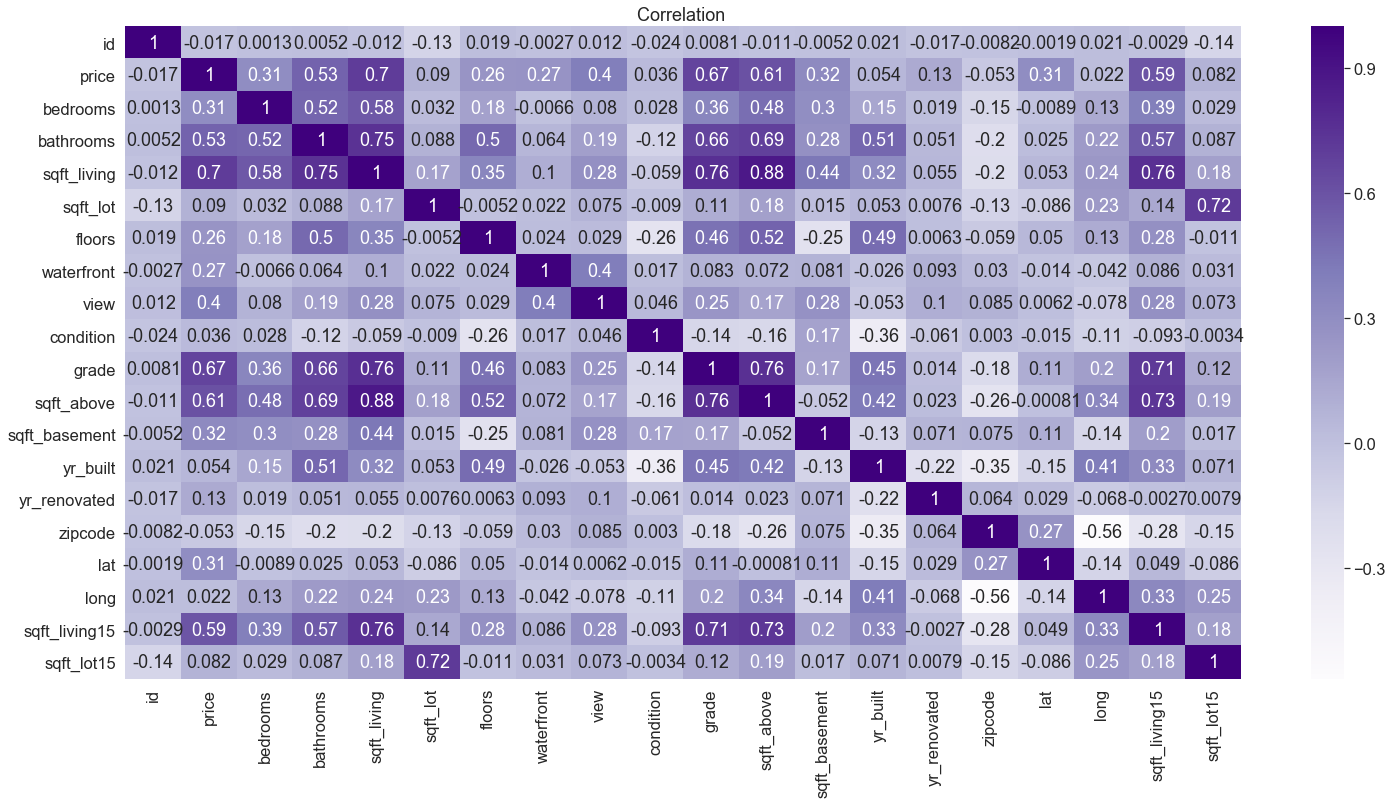

In [303]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(25,12))
cr = sns.heatmap(df.corr('pearson'), annot=True, cmap='Purples')
cr.set_title("Correlation ")


The strongest corelation with feature price is feature sqft_lot, so that's feature will used to be the only one indepnedent variable

# Outlier Handling

Text(0.5, 1.0, 'price')

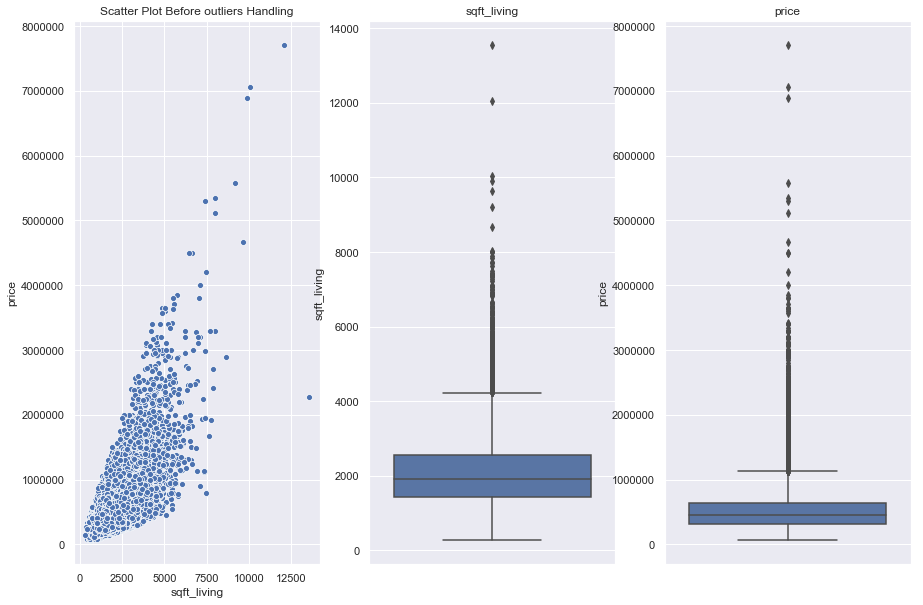

In [304]:
sns.set(font_scale=1)
plt.figure(figsize = (15,10))

plt.subplot(1,3,1)
sns.scatterplot(x="sqft_living", y="price",
                     data=df)
plt.title('Scatter Plot Before outliers Handling')

plt.subplot(1,3,2)
sns.boxplot(y=df['sqft_living'])
plt.title('sqft_living')

plt.subplot(1,3,3)
sns.boxplot(y=df['price'])
plt.title('price')


In [309]:
Q1_prc = df['price'].describe()['25%']
Q3_prc = df['price'].describe()['75%']
IQRCprc = Q3_prc - Q1_prc
df1 = df[(df['price'] >= Q1_prc - (1.5*IQRCprc)) & 
   (df['price'] <= Q3_prc + (1.5*IQRCprc))]

df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.046700e+04,2.046700e+04,20467.000000,20467.000000,20467.000000,2.046700e+04,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20465.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000
mean,4.603223e+09,4.769846e+05,3.329750,2.051632,1975.558167,1.461041e+04,1.476035,0.002980,0.172668,3.406361,7.530561,1708.328854,267.227195,1970.811013,74.681145,98078.555773,47.556888,-122.213265,1922.255191,12447.084526
std,2.877364e+09,2.083713e+05,0.912885,0.711906,774.833460,4.010956e+04,0.537033,0.054513,0.640950,0.647228,1.039192,727.330833,409.031661,29.160540,378.761647,53.336953,0.141038,0.142412,614.932010,26538.592250
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.131701e+09,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,47.460400,-122.330000,1470.000000,5046.000000
50%,3.905082e+09,4.375000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1974.000000,0.000000,98065.000000,47.567000,-122.232000,1800.000000,7542.000000
75%,7.338101e+09,6.000000e+05,4.000000,2.500000,2431.000000,1.031900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,510.000000,1996.000000,0.000000,98118.000000,47.679800,-122.123000,2280.000000,9883.500000
max,9.900000e+09,1.127500e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5380.000000,871200.000000


Text(0.5, 1.0, 'price')

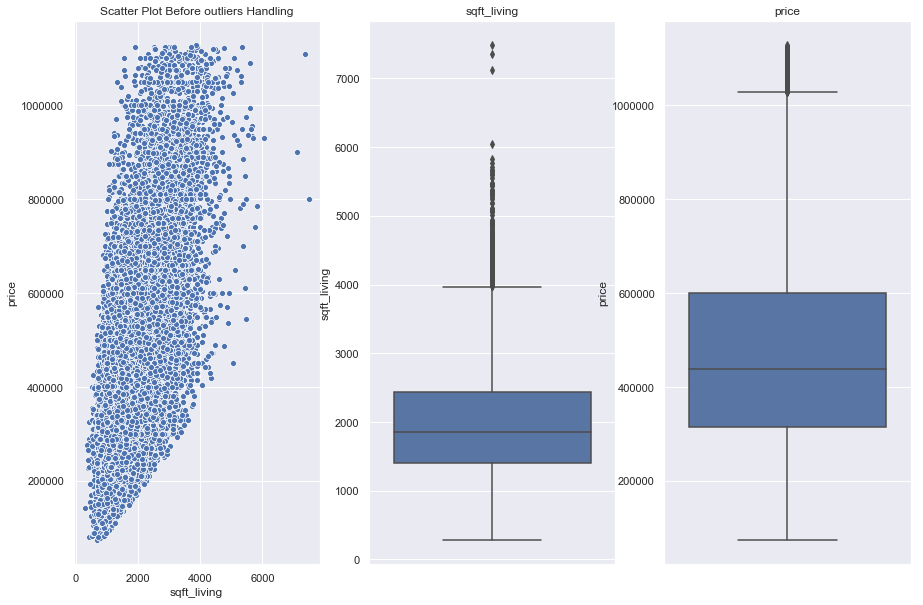

In [310]:
sns.set(font_scale=1)
plt.figure(figsize = (15,10))

plt.subplot(1,3,1)
sns.scatterplot(x="sqft_living", y="price",
                     data=df1)
plt.title('Scatter Plot Before outliers Handling')

plt.subplot(1,3,2)
sns.boxplot(y=df1['sqft_living'])
plt.title('sqft_living')

plt.subplot(1,3,3)
sns.boxplot(y=df1['price'])
plt.title('price')



In [319]:
Q1_sqft_liv = df1['sqft_living'].describe()['25%']
Q3_sqft_liv = df1['sqft_living'].describe()['75%']
IQR_sqft_liv  = Q3_sqft_liv - Q1_sqft_liv
df1 = df1[(df1['sqft_living'] >= Q1_sqft_liv - (1.5*IQR_sqft_liv)) & 
   (df1['sqft_living'] <= Q3_sqft_liv + (1.5*IQR_sqft_liv))]

df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.014700e+04,2.014700e+04,20147.000000,20147.000000,20147.000000,2.014700e+04,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20145.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000
mean,4.612711e+09,4.710953e+05,3.312056,2.029707,1936.536507,1.399957e+04,1.469400,0.002978,0.167022,3.409887,7.497047,1676.884835,259.646399,1970.457289,74.674691,98078.861518,47.556843,-122.215003,1901.230605,12052.073460
std,2.876677e+09,2.034262e+05,0.902392,0.689733,713.088133,3.787604e+04,0.536718,0.054492,0.630513,0.649139,1.003928,681.775880,395.857722,29.168649,378.735350,53.448706,0.141140,0.141805,587.880153,24972.954613
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.141316e+09,3.140000e+05,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,47.459900,-122.331000,1460.000000,5020.000000
50%,3.918400e+09,4.345000e+05,3.000000,2.000000,1840.000000,7.482000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1500.000000,0.000000,1974.000000,0.000000,98070.000000,47.567000,-122.236000,1790.000000,7500.000000
75%,7.340600e+09,5.950000e+05,4.000000,2.500000,2400.000000,1.020000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2060.000000,500.000000,1995.000000,0.000000,98118.000000,47.679850,-122.125000,2250.000000,9794.000000
max,9.900000e+09,1.127500e+06,33.000000,5.750000,3970.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,11.000000,3970.000000,1990.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,560617.000000


Text(0.5, 1.0, 'price')

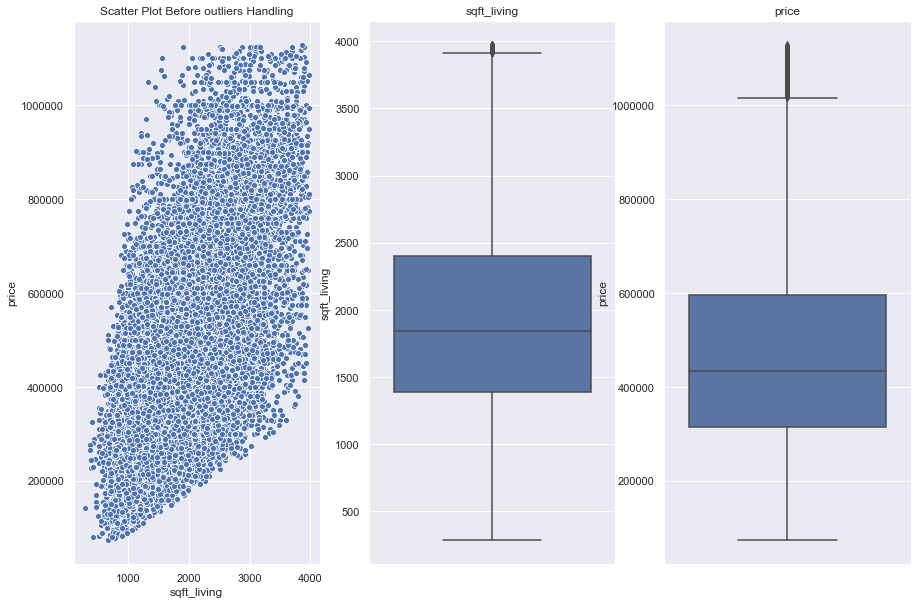

In [320]:
sns.set(font_scale=1)
plt.figure(figsize = (15,10))

plt.subplot(1,3,1)
sns.scatterplot(x="sqft_living", y="price",
                     data=df1)
plt.title('Scatter Plot Before outliers Handling')

plt.subplot(1,3,2)
sns.boxplot(y=df1['sqft_living'])
plt.title('sqft_living')

plt.subplot(1,3,3)
sns.boxplot(y=df1['price'])
plt.title('price')




# Splitting

In [321]:
from sklearn.model_selection import train_test_split

In [322]:
sqft_liv = df1['sqft_living']
price = df1['price']

In [323]:
X = np.array(sqft_liv).reshape(-1, 1)
y = np.array(price)

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


# Machine Learning Model

#### Normal Fitting

In [325]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from scipy.stats import linregress

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [326]:
test_pred = regressor.predict(X_test)
train_pred = regressor.predict(X_train)

In [327]:
print('Result Model Performance Simple Linear Regression : ')
print('')

print('Y Train')
print('MAE:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R2  Score:', metrics.r2_score(y_train, train_pred))

print('')

print('Y Test')
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('R2  Score:', metrics.r2_score(y_test, test_pred))




Result Model Performance Simple Linear Regression : 

Y Train
MAE: 130388.46917846022
MSE: 26291083301.421074
RMSE: 162145.25371228438
R2  Score: 0.3601579212109859

Y Test
MAE: 132298.9954764648
MSE: 26935950505.21216
RMSE: 164121.75512470052
R2  Score: 0.36663283652443057


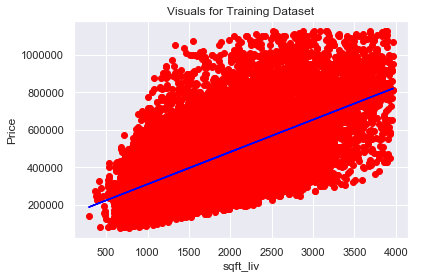

LinregressResult(slope=171.69553363393175, intercept=138349.05402406421, rvalue=0.6001315865799652, pvalue=0.0, stderr=1.802742744613348)



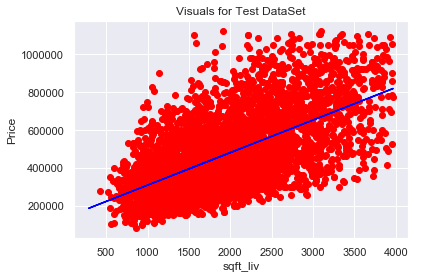

LinregressResult(slope=170.86971339659524, intercept=141216.42771699472, rvalue=0.6055399226542681, pvalue=0.0, stderr=3.5382593361461088)


In [328]:
sns.set(font_scale=1)

#Visualizing the training Test Results 
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("sqft_liv")
plt.ylabel("Price")
plt.show()

print(linregress(X_train.reshape(1,-1)[0], y_train))
print('')

#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("sqft_liv")
plt.ylabel("Price")
plt.show()

print(linregress(X_test.reshape(1,-1)[0], y_test))

#### Polynomial deg 1 fitting

In [329]:
polynomial_features_deg1= PolynomialFeatures(degree=1)
X_train_poly_deg1 = polynomial_features_deg1.fit_transform(X_train)
X_test_poly_deg1 = polynomial_features_deg1.fit_transform(X_test)

y_train_poly_deg1 = polynomial_features_deg1.fit_transform(y_train.reshape(-1,1))
y_test_poly_deg1 = polynomial_features_deg1.fit_transform(y_test.reshape(-1,1))

# X_train

In [330]:
regressor_poly_deg1 = LinearRegression()
regressor_poly_deg1.fit(X_train_poly_deg1, y_train_poly_deg1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [331]:
test_pred_pol_deg1 = regressor_poly_deg1.predict(X_test_poly_deg1)
train_pred_pol_deg1 = regressor_poly_deg1.predict(X_train_poly_deg1)


In [332]:
print('Result Model Performance Simple Linear Regression : ')
print('')

print('Y Train')
print('MAE:', metrics.mean_absolute_error(y_train_poly_deg1, train_pred_pol_deg1))
print('MSE:', metrics.mean_squared_error(y_train_poly_deg1, train_pred_pol_deg1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train_poly_deg1, train_pred_pol_deg1)))
print('R2  Score:', metrics.r2_score(y_train_poly_deg1, train_pred_pol_deg1))

print('')

print('Y Test')
print('MAE:', metrics.mean_absolute_error(y_test_poly_deg1, test_pred_pol_deg1))
print('MSE:', metrics.mean_squared_error(y_test_poly_deg1, test_pred_pol_deg1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_poly_deg1, test_pred_pol_deg1)))
print('R2  Score:', metrics.r2_score(y_test_poly_deg1, test_pred_pol_deg1))







Result Model Performance Simple Linear Regression : 

Y Train
MAE: 65194.23458922991
MSE: 13145541650.71053
RMSE: 114654.00843716948
R2  Score: 0.6800789606054944

Y Test
MAE: 66149.49773823228
MSE: 13467975252.606104
RMSE: 116051.60598891384
R2  Score: 0.6833164182622149


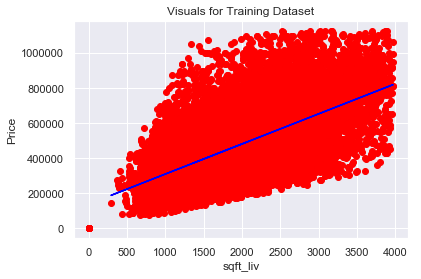

LinregressResult(slope=228.18904558704338, intercept=14449.07651176618, rvalue=0.9018130127640014, pvalue=0.0, stderr=0.6090396139767845)



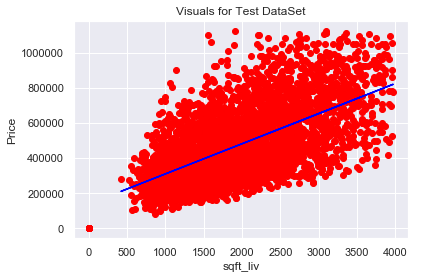

LinregressResult(slope=227.50420204073527, intercept=15300.68956487975, rvalue=0.9011429079011141, pvalue=0.0, stderr=1.2192518396522272)


In [333]:
sns.set(font_scale=1)

#Visualizing the training Test Results 
plt.scatter(X_train_poly_deg1, y_train_poly_deg1, color= 'red')
plt.plot(X_train_poly_deg1, regressor_poly_deg1.predict(X_train_poly_deg1), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("sqft_liv")
plt.ylabel("Price")
plt.show()



# print(linregress(X_train.reshape(1,-1)[0], y_train))
print(linregress(X_train_poly_deg1.reshape(1,-1)[0], y_train_poly_deg1.reshape(1,-1)[0]))
print('')


#Visualizing the Test Results 
plt.scatter(X_test_poly_deg1, y_test_poly_deg1, color= 'red')
plt.plot(X_test_poly_deg1, regressor_poly_deg1.predict(X_test_poly_deg1), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("sqft_liv")
plt.ylabel("Price")
plt.show()

print(linregress(X_test_poly_deg1.reshape(1,-1)[0], y_test_poly_deg1.reshape(1,-1)[0]))


##### garis biru adalah slope
slope (b) = r(sy/sx)
- rvalue = pearson correlation coef = (sigma((x-xrata2)(y-yrata2))/akar(sigma(x-xrata2)^2 * sigma(y-yrata2)^2)
- sy = std y
- sx = std x

#### intercept = ujung garis paling kiri di nyentuh nilei sumbu y berapa
intercept (a) = ymean - bxmean
- ymean = y rata2
- b = slope
- x = x rata3


